# Data Processing

In [31]:
import json
import os
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import os
import numpy as np
import neurokit2 as nk

In [32]:
import numpy as np
import pandas as pd
import neurokit2 as nk

def convert_to_dataframe(user_data, desired_sampling_rate=78):
    # Extract user details
    details = user_data["user_details"]
    name = details['name']
    
    # Create DataFrame for timestamp and feature signals
    df = pd.DataFrame({
        "timestamp": user_data["timestamp"],  # Assuming these timestamps are in milliseconds
        "ECG": user_data["ecg"],
        "GSR": user_data["gsr"],
        "PPG_red": user_data["ppg_red"],
        "PPG_ir": user_data["ppg_ir"],
        "PPG_green": user_data["ppg_green"],
        "absolute_time": user_data["absolute_time"]  # In seconds
    })
    
    # Calculate the sampling frequency directly from timestamps (in milliseconds, converted to seconds for rate calculation)
    time_diffs = np.diff(df['timestamp']) / 1000.0  # Convert differences to seconds
    avg_sampling_interval = np.mean(time_diffs)
    original_sampling_rate = round(1 / avg_sampling_interval) if avg_sampling_interval > 0 else None
    
    print(f"Original Sampling Rate: {original_sampling_rate} Hz")
    
    if original_sampling_rate is not None:
        # Resample signals and create a new DataFrame for resampled data
        resampled_data = {
            "ECG": nk.signal_resample(signal=df['ECG'].to_numpy(), 
                                      sampling_rate=original_sampling_rate, 
                                      desired_sampling_rate=desired_sampling_rate),
            "GSR": nk.signal_resample(signal=df['GSR'].to_numpy(), 
                                      sampling_rate=original_sampling_rate, 
                                      desired_sampling_rate=desired_sampling_rate),
            "PPG_red": nk.signal_resample(signal=df['PPG_red'].to_numpy(), 
                                          sampling_rate=original_sampling_rate, 
                                          desired_sampling_rate=desired_sampling_rate),
            "PPG_ir": nk.signal_resample(signal=df['PPG_ir'].to_numpy(), 
                                         sampling_rate=original_sampling_rate, 
                                         desired_sampling_rate=desired_sampling_rate),
            "PPG_green": nk.signal_resample(signal=df['PPG_green'].to_numpy(), 
                                            sampling_rate=original_sampling_rate, 
                                            desired_sampling_rate=desired_sampling_rate),
        }
        
        # Calculate new interval for absolute time in seconds
        interval_seconds = 1.0 / desired_sampling_rate
        
        # Generate new absolute timestamps based on the desired sampling rate
        initial_absolute_time = df['absolute_time'].iloc[0]
        new_length = len(resampled_data["ECG"])
        resampled_absolute_times = [initial_absolute_time + i * interval_seconds for i in range(new_length)]
        
        # Create a new DataFrame for the resampled data
        resampled_df = pd.DataFrame(resampled_data)
        resampled_df["absolute_time"] = resampled_absolute_times
        
        # Update the DataFrame attributes to include user details and sampling frequency
        resampled_df.attrs = {**details, "sampling_frequency": desired_sampling_rate}
        
        return name, resampled_df
    else:
        # Handle case where original sampling rate could not be determined
        df.attrs = {**details, "sampling_frequency": None}
        return name, df


In [33]:
FileNames = ["Alysonn_2024-03-07_17-58-45",
             "Jared_2024-03-07_18-54-03",
             "Thomas_2024-03-07_19-47-05",
             "Lia Llorca_2024-03-05_19-04-49",
             "William Powell_2024-03-04_18-23-11",
             "Aaron Fainman_2024-03-12_15-20-57",
             "gabriella_2024-03-12_18-24-59",
             "Genaro_2024-03-12_16-06-10",
             "Joe_2024-03-12_17-36-10",
             "Kostas_2024-03-12_16-54-27",
             "shaushan_2024-03-12_19-32-25"
             ]

# Dictionary to hold DataFrames for each file
dataframes = {}

# Base path assumes files are one directory up from the current script's directory
base_path = os.path.join(os.getcwd(), '..')

# Loop through each file in FileNames
for file_name in FileNames:
    json_file_path = os.path.join(base_path, f"Data/{file_name}.json")  # Construct file path
    normalized_path = os.path.normpath(json_file_path)  # Normalize the path

    try:
        with open(normalized_path, 'r') as file:
            data = json.load(file)
        print(f"JSON data successfully loaded from {file_name}.")

        print("Data keys:" , data.keys())
            
        # Convert dictionary to pandas DataFrame
        names, df = convert_to_dataframe(data)
        
        # Store the DataFrame in the dictionary
        dataframes[names] = df

    except Exception as e:
        print(f"Failed to load JSON data from {file_name}: {e}")

JSON data successfully loaded from Alysonn_2024-03-07_17-58-45.
Data keys: dict_keys(['user_details', 'timestamp', 'absolute_time', 'ecg', 'gsr', 'ppg_red', 'ppg_ir', 'ppg_green', 'temp'])
Original Sampling Rate: 80 Hz


JSON data successfully loaded from Jared_2024-03-07_18-54-03.
Data keys: dict_keys(['user_details', 'timestamp', 'absolute_time', 'ecg', 'gsr', 'ppg_red', 'ppg_ir', 'ppg_green', 'temp'])
Original Sampling Rate: 79 Hz
JSON data successfully loaded from Thomas_2024-03-07_19-47-05.
Data keys: dict_keys(['user_details', 'timestamp', 'absolute_time', 'ecg', 'gsr', 'ppg_red', 'ppg_ir', 'ppg_green', 'temp'])
Original Sampling Rate: 79 Hz
JSON data successfully loaded from Lia Llorca_2024-03-05_19-04-49.
Data keys: dict_keys(['user_details', 'timestamp', 'absolute_time', 'ecg', 'gsr', 'ppg_red', 'ppg_ir', 'ppg_green', 'temp'])
Original Sampling Rate: 132 Hz
JSON data successfully loaded from William Powell_2024-03-04_18-23-11.
Data keys: dict_keys(['user_details', 'timestamp', 'absolute_time', 'ecg', 'gsr', 'ppg_red', 'ppg_ir', 'ppg_green', 'temp'])
Original Sampling Rate: 132 Hz
JSON data successfully loaded from Aaron Fainman_2024-03-12_15-20-57.
Data keys: dict_keys(['user_details', 'timest

In [1]:
FileTime = [
            "allyson-burba_subject-3_starttime-1709832653.3539333",
            "jared-joselowitz_subject-4_starttime-1709835964.3583503",
            "thomas-auguste_subject-5_starttime-1709839154.9869092",
            "lia-llorca_subject-2_starttime-1709663763.6199603",
            "will-powell_subject-0_starttime-1709575216.1554863",
            "aaron_subject-6_starttime-1710255164.7718544",
            "ziyun-fu_subject-10_starttime-1710266215.2685192",
            "gennaro-sorrentino_subject-7_starttime-1710257714.902967",
            "xinyi-zheng_subject-9_starttime-1710263294.17601",
            "kostas-rotas_subject-8_starttime-1710260801.7820604",
            "shaushan-11_starttime-1710268994.271387"
            ]

data_time = {}
for filetime in FileTime:
    json_file_path = os.path.join(base_path, f"Data/Time Data/{filetime}.json")  # Construct file path
    normalized_path = os.path.normpath(json_file_path)  # Normalize the path
    filetimename = filetime.split("-")[0]
    try:
        with open(normalized_path, 'r') as file:
            data_time[filetimename] = json.load(file)
            print(filetimename)
        print(f"JSON data successfully loaded from {filetime}.")
    

    except Exception as e:
        print(f"Failed to load JSON data from {filetime}: {e}")
        
Name = 'Alysonn'
name = 'allyson'

# FileNames = ["Alysonn_2024-03-07_17-58-45",
#              "Jared_2024-03-07_18-54-03",
#              "Thomas_2024-03-07_19-47-05",
#              "Lia Llorca_2024-03-05_19-04-49",
#              "William Powell_2024-03-04_18-23-11",
#              "Aaron Fainman_2024-03-12_15-20-57",
#              "gabriella_2024-03-12_18-24-59",
#              "Genaro_2024-03-12_16-06-10",
#              "Joe_2024-03-12_17-36-10",
#              "Kostas_2024-03-12_16-54-27",
#              "shaushan_2024-03-12_19-32-25"
#              ]
# FileTime = [
#             "allyson-burba_subject-3_starttime-1709832653.3539333",
#             "jared-joselowitz_subject-4_starttime-1709835964.3583503",
#             "thomas-auguste_subject-5_starttime-1709839154.9869092",
#             "lia-llorca_subject-2_starttime-1709663763.6199603",
#             "will-powell_subject-0_starttime-1709575216.1554863",
#             "aaron_subject-6_starttime-1710255164.7718544",
#             "ziyun-fu_subject-10_starttime-1710266215.2685192",
#             "gennaro-sorrentino_subject-7_starttime-1710257714.902967",
#             "xinyi-zheng_subject-9_starttime-1710263294.17601",
#             "kostas-rotas_subject-8_starttime-1710260801.7820604",
#             "shaushan-11_starttime-1710268994.271387"
#             ]
start_times = data_time[name]['time_recordings'][0]['video_start_time']
end_times = data_time[name]['time_recordings'][0]['video_end_time']
conditions = {
    1: 1, 2: 1, 3: 1, 5: 1, 11: 1, 12: 1, 13: 1, 14: 1,
    16: 2, 17: 2, 18: 2, 20: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 2,
    31: 3, 32: 3, 33: 3, 38: 3, 39: 3, 41: 3, 44: 3, 45: 3,
    48: 4, 51: 4, 52: 4, 53: 4, 54: 4, 55: 4, 56: 4, 57: 4, 58: 4, 59: 4, 60: 4,
    62: 1, 64: 1, 65: 1, 66: 1, 70: 1, 71: 1, 72: 1, 73: 1, 75: 1,
    76: 2, 77: 2, 81: 2, 83: 2, 85: 2, 86: 2, 88: 2,
    91: 3, 95: 3, 101: 3,
    110: 4, 114: 4, 119: 4, 120: 4
}

video_condition = []

for val in data_time[name]['time_recordings'][0]['video_name']:
    video_number = int(val.split(".")[0])  # Convert to integer for comparison
    condition = conditions.get(video_number)  # Use .get() to avoid KeyError if the number is not found
    if condition is not None:  # Only append if the condition was found
        video_condition.append(condition)


def get_condition_for_time(absolute_time, start_times, end_times, video_condition):
    for start, end, condition in zip(start_times, end_times, video_condition):
        if start <= absolute_time <= end:
            return condition
    return None

# Vectorize the condition assignment
dataframes[Name]['label'] = dataframes[Name]['absolute_time'].apply(lambda x: get_condition_for_time(x, start_times, end_times, video_condition))

# Now 'label' column in your DataFrame is populated based on the conditions
# Save the updated DataFrame to a CSV file
dataframes[Name].to_csv(f'{Name}_labeled.csv', index=False)
#

# Count the number of rows for each non-NaN 'label' type
label_counts = dataframes[Name]['label'].value_counts()

# Print the counts for each label type
print("Counts of rows for each non-NaN 'label' type:")
print(label_counts)

# Now 'label' column in your DataFrame is populated based on the conditions
# Save the updated DataFrame to a CSV file
dataframes[Name].to_csv(f'{Name}_labeled.csv', index=False)

NameError: name 'os' is not defined

In [35]:
start_times = data_time[name]['time_recordings'][0]['video_start_time']
end_times = data_time[name]['time_recordings'][0]['video_end_time']
conditions = {
    1: 1, 2: 1, 3: 1, 5: 1, 11: 1, 12: 1, 13: 1, 14: 1,
    16: 2, 17: 2, 18: 2, 20: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 2,
    31: 3, 32: 3, 33: 3, 38: 3, 39: 3, 41: 3, 44: 3, 45: 3,
    48: 4, 51: 4, 52: 4, 53: 4, 54: 4, 55: 4, 56: 4, 57: 4, 58: 4, 59: 4, 60: 4,
    62: 1, 64: 1, 65: 1, 66: 1, 70: 1, 71: 1, 72: 1, 73: 1, 75: 1,
    76: 2, 77: 2, 81: 2, 83: 2, 85: 2, 86: 2, 88: 2,
    91: 3, 95: 3, 101: 3,
    110: 4, 114: 4, 119: 4, 120: 4
}

video_condition = []

for val in data_time[name]['time_recordings'][0]['video_name']:
    video_number = int(val.split(".")[0])  # Convert to integer for comparison
    condition = conditions.get(video_number)  # Use .get() to avoid KeyError if the number is not found
    if condition is not None:  # Only append if the condition was found
        video_condition.append(condition)


def get_condition_for_time(absolute_time, start_times, end_times, video_condition):
    for start, end, condition in zip(start_times, end_times, video_condition):
        if start <= absolute_time <= end:
            return condition
    return None

# Vectorize the condition assignment
dataframes[Name]['label'] = dataframes[Name]['absolute_time'].apply(lambda x: get_condition_for_time(x, start_times, end_times, video_condition))

# Now 'label' column in your DataFrame is populated based on the conditions
# Save the updated DataFrame to a CSV file
dataframes[Name].to_csv(f'{Name}_labeled.csv', index=False)
#

# Count the number of rows for each non-NaN 'label' type
label_counts = dataframes[Name]['label'].value_counts()

# Print the counts for each label type
print("Counts of rows for each non-NaN 'label' type:")
print(label_counts)

# Now 'label' column in your DataFrame is populated based on the conditions
# Save the updated DataFrame to a CSV file
dataframes[Name].to_csv(f'{Name}_labeled.csv', index=False)

Counts of rows for each non-NaN 'label' type:
label
2.0    23401
1.0    23401
4.0    14040
3.0     9360
Name: count, dtype: int64


Event Conditions

File times

## Events of Data

event_onsets (array or list) – A list of events onset.

event_durations (array or list) – A list of durations. If none is passed, will take the duration between each onset (i.e., will assume that events are consecutive).

event_labels (list) – A list containing unique event identifiers. If None, will use the event index number.

event_conditions (list) – An optional list containing, for each event, for example the trial category, group or experimental conditions.

In [36]:
start_times = data_time[name]['time_recordings'][0]['video_start_time']
end_times = data_time[name]['time_recordings'][0]['video_end_time']

In [37]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame and start_times is your list of start times
absolute_time_series = pd.Series(dataframes[Name]['absolute_time'])  # Convert the column to a series if not already
start_times_series = pd.Series(start_times)  # Convert your list of start times to a series
end_time_series = pd.Series(end_times) 
# Function to find the closest time and return its index
def find_closest_time(target, time_series):
    # Find the absolute difference between the target and all times in the series
    differences = np.abs(time_series - target)
    # Return the index of the smallest difference
    return differences.idxmin()

# Apply the function to each start time
start_indices = start_times_series.apply(find_closest_time, args=(absolute_time_series,)).tolist()

end_indices = end_time_series.apply(find_closest_time, args=(absolute_time_series,)).tolist()
duration_indices = []
for i in range(len(start_indices)):
    duration_indices.append(end_indices[i] - start_indices[i])

# Print or use the indices as needed
print(start_indices)
print(end_indices)
print(duration_indices)


[7271, 15857, 24442, 33028, 41612, 50199, 58784, 67370, 75955, 84541, 93127, 101712, 110297, 118882, 127468]
[11951, 20537, 29122, 37708, 46293, 54880, 63465, 72050, 80635, 89222, 97807, 106392, 114977, 123562, 132148]
[4680, 4680, 4680, 4680, 4681, 4681, 4681, 4680, 4680, 4681, 4680, 4680, 4680, 4680, 4680]


In [38]:

cut_end = end_indices[-1] + 1000

dataframes[Name] = dataframes[Name].iloc[1:cut_end]


In [39]:

video_name = data_time[name]['time_recordings'][0]['video_name']


SF = dataframes[Name].attrs['sampling_frequency']

indexes_to_analyze = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]  # Define which indexes you want to analyze
event_onset_delay = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
# Select and then scale
event_onsets = [start_indices[i] for i in indexes_to_analyze]
event_durations = [duration_indices[i] for i in indexes_to_analyze]
event_labels = [video_name[i] for i in indexes_to_analyze]
event_conditions = [video_condition[i] for i in indexes_to_analyze]

# Create events
events = nk.events_create(event_onsets=event_onsets,
                          event_durations=event_durations, 
                          event_labels=event_labels,
                          event_conditions=event_conditions)


# ECG

Text(0.5, 1.0, 'Cleaned ECG')

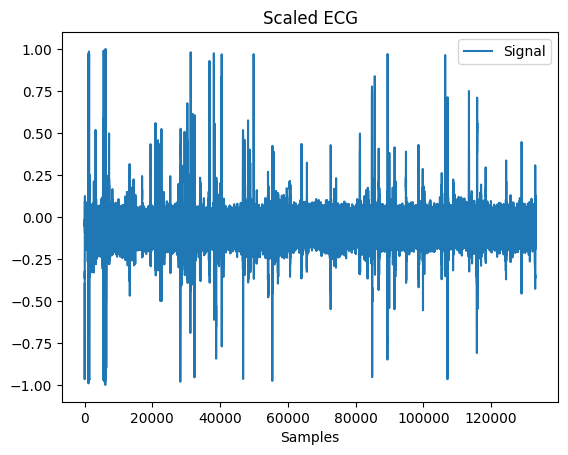

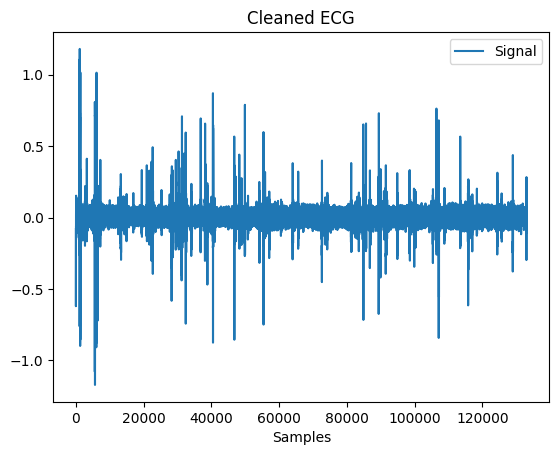

In [40]:
from sklearn.preprocessing import RobustScaler

# Calculate the mean and standard deviation
mean = dataframes[Name]['ECG'].mean()
std_dev = dataframes[Name]['ECG'].std()

remove_outlier = False
if remove_outlier:
    # Define your threshold for deviation from the mean
    threshold = 2

    # Filter out outliers
    outliers_mask = (dataframes[Name]['ECG'] < mean - threshold * std_dev) | (dataframes[Name]['ECG'] > mean + threshold * std_dev)

    outliers = dataframes[Name]['ECG'][outliers_mask]

    filtered_ecg = dataframes[Name]['ECG'][~outliers_mask]

    nk.signal_plot(dataframes[Name]['ECG'])

    fig = plt.gcf()
    plt.title('Raw ECG')

    plt.figure()
    plt.scatter(dataframes[Name]['timestamp'][outliers_mask], outliers, color = 'red')
    plt.scatter(dataframes[Name]['timestamp'][~outliers_mask], filtered_ecg, color = 'blue')
    plt.title('Outlier Removal')
    # Reshape data for the scaler
    data_reshaped = filtered_ecg.values.reshape(-1, 1)
    
else:
    data_reshaped = dataframes[Name]['ECG'].values.reshape(-1, 1)
    
# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the data with RobustScaler
data_robust_scaled = robust_scaler.fit_transform(data_reshaped)

# Manually scale to [-1, 1] based on the robustly scaled data
data_scaled_to_range = np.interp(data_robust_scaled, (data_robust_scaled.min(), data_robust_scaled.max()), (-1, 1))

# Convert back to a pandas series, if needed
ecg_data = pd.Series(data_scaled_to_range.flatten())

nk.signal_plot(ecg_data)

fig = plt.gcf()
plt.title('Scaled ECG')

# Process ecg
ecg_signals, info = nk.ecg_process(ecg_data, sampling_rate = SF, method = 'neurokit')
nk.signal_plot(ecg_signals['ECG_Clean'])
fig = plt.gcf()
plt.title('Cleaned ECG') 



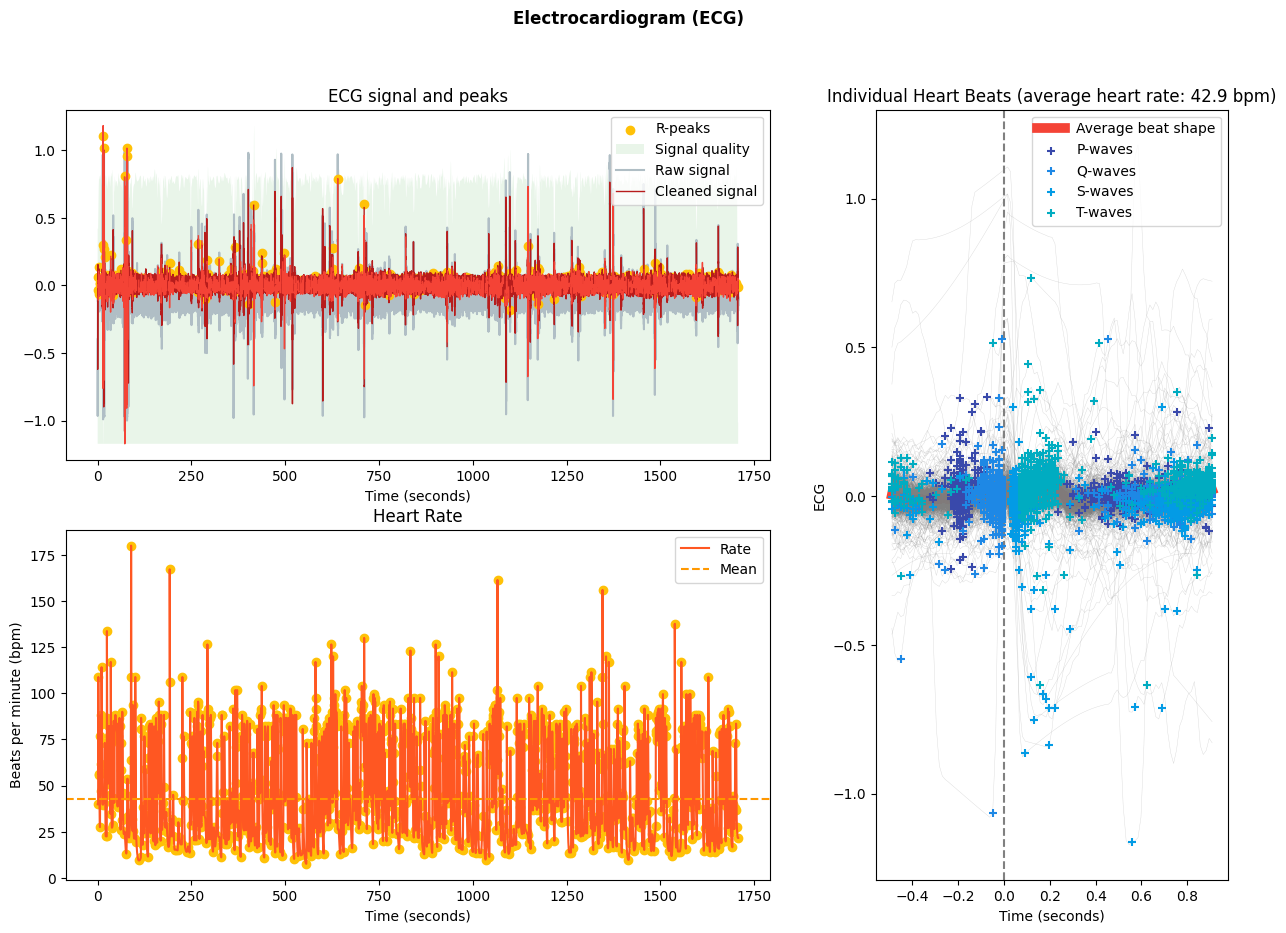

In [41]:
nk.ecg_plot(ecg_signals, info)
fig = plt.gcf()
fig.set_size_inches(15, 10, forward=True)
# fig.savefig("myfig.png")

These features include the RMSSD (square root of the mean of the sum of successive differences between adjacent RR intervals), MeanNN (mean of RR intervals) 

### Interval ECG

MeanNN: The mean of the RR intervals.

SDNN: The standard deviation of the RR intervals.

SDANN1, SDANN2, SDANN5: The standard deviation of average RR intervals extracted from n-minute segments of time series data (1, 2 and 5 by default). Note that these indices require a minimal duration of signal to be computed (3, 6 and 15 minutes respectively) and will be silently skipped if the data provided is too short.

SDNNI1, SDNNI2, SDNNI5: The mean of the standard deviations of RR intervals extracted from n-minute segments of time series data (1, 2 and 5 by default). Note that these indices require a minimal duration of signal to be computed (3, 6 and 15 minutes respectively) and will be silently skipped if the data provided is too short.

RMSSD: The square root of the mean of the squared successive differences between adjacent RR intervals. It is equivalent (although on another scale) to SD1, and therefore it is redundant to report correlations with both (Ciccone, 2017).

SDSD: The standard deviation of the successive differences between RR intervals.

CVNN: The standard deviation of the RR intervals (SDNN) divided by the mean of the RR intervals (MeanNN).

CVSD: The root mean square of successive differences (RMSSD) divided by the mean of the RR intervals (MeanNN).

MedianNN: The median of the RR intervals.

MadNN: The median absolute deviation of the RR intervals.

MCVNN: The median absolute deviation of the RR intervals (MadNN) divided by the median of the RR intervals (MedianNN).

IQRNN: The interquartile range (IQR) of the RR intervals.

SDRMSSD: SDNN / RMSSD, a time-domain equivalent for the low Frequency-to-High Frequency (LF/HF) Ratio (Sollers et al., 2007).

Prc20NN: The 20th percentile of the RR intervals (Han, 2017; Hovsepian, 2015).

Prc80NN: The 80th percentile of the RR intervals (Han, 2017; Hovsepian, 2015).

pNN50: The proportion of RR intervals greater than 50ms, out of the total number of RR intervals.

pNN20: The proportion of RR intervals greater than 20ms, out of the total number of RR intervals.

MinNN: The minimum of the RR intervals (Parent, 2019; Subramaniam, 2022).

MaxNN: The maximum of the RR intervals (Parent, 2019; Subramaniam, 2022).

TINN: A geometrical parameter of the HRV, or more specifically, the baseline width of the RR intervals distribution obtained by triangular interpolation, where the error of least squares determines the triangle. It is an approximation of the RR interval distribution.

HTI: The HRV triangular index, measuring the total number of RR intervals divided by the height of the RR intervals histogram.

In [42]:
events

{'onset': [7271,
  15857,
  24442,
  33028,
  41612,
  50199,
  58784,
  67370,
  75955,
  84541,
  93127,
  101712,
  110297,
  118882,
  127468],
 'duration': [4680,
  4680,
  4680,
  4680,
  4681,
  4681,
  4681,
  4680,
  4680,
  4681,
  4680,
  4680,
  4680,
  4680,
  4680],
 'label': ['27.mp4',
  '3.mp4',
  '83.mp4',
  '101.mp4',
  '53.mp4',
  '48.mp4',
  '86.mp4',
  '2.mp4',
  '20.mp4',
  '62.mp4',
  '120.mp4',
  '45.mp4',
  '11.mp4',
  '23.mp4',
  '13.mp4'],
 'condition': [2, 1, 2, 3, 4, 4, 2, 1, 2, 1, 4, 3, 1, 2, 1]}

In [43]:
epochs = nk.epochs_create(ecg_signals,
                            events = events,
                            epochs_start=event_onset_delay,
                            sampling_rate = SF, 
                            baseline_correction=False)

ECG_Features = nk.ecg_intervalrelated(epochs)

c:\Users\lauri\.virtualenvs\AML-dynaMix-AryBn7L8\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
c:\Users\lauri\.virtualenvs\AML-dynaMix-AryBn7L8\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
c:\Users\lauri\.virtualenvs\AML-dynaMix-AryBn7L8\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation 

In [44]:
# List of columns to be removed
columns_to_remove = ['HRV_SDANN1', 'HRV_SDNNI1', 'HRV_SDANN2', 'HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5','HRV_SDNNI5',"HRV_ULF","HRV_VLF","HRV_LF","HRV_HF","HRV_VHF","HRV_TP","HRV_LFHF","HRV_LFn","HRV_HFn","HRV_LnHF"]

# Drop specified columns
ECG_Features_Clean = ECG_Features.drop(columns=columns_to_remove)

print(ECG_Features_Clean)


           Label  ECG_Rate_Mean              HRV_MeanNN  \
27.mp4    27.mp4      37.084930  [[136.58620689655172]]   
3.mp4      3.mp4      30.718463              [[161.04]]   
83.mp4    83.mp4      35.783187  [[147.35714285714286]]   
101.mp4  101.mp4      44.724349  [[112.08108108108108]]   
53.mp4    53.mp4      30.801723               [[168.5]]   
48.mp4    48.mp4      45.721948  [[108.43589743589743]]   
86.mp4    86.mp4      45.752034  [[103.51282051282051]]   
2.mp4      2.mp4      42.044447  [[117.38235294117646]]   
20.mp4    20.mp4      32.063718               [[168.6]]   
62.mp4    62.mp4      34.118211  [[150.10714285714286]]   
120.mp4  120.mp4      56.165181   [[85.44897959183673]]   
45.mp4    45.mp4      44.034920  [[117.65714285714286]]   
11.mp4    11.mp4      37.376429  [[133.31034482758622]]   
23.mp4    23.mp4      39.097850             [[128.875]]   
13.mp4    13.mp4      38.777551   [[132.1290322580645]]   

                       HRV_SDNN               HRV_RMSSD

### ECG Derived RSP Features

Returns: 

"RSP_Rate_Mean": the mean respiratory rate.

"RSP_Amplitude_Mean": the mean respiratory amplitude.

"RSP_RRV": the different respiratory rate variability metrices. See below.

"RSP_Phase_Duration_Inspiration": the average inspiratory duration.

"RSP_Phase_Duration_Expiration": the average expiratory duration.

"RSP_Phase_Duration_Ratio ": the inspiratory-to-expiratory time ratio (I/E).

#### RSP_RRV

"RRV_SDBB": the standard deviation of the breath-to-breath intervals.

"RRV_RMSSD": the root mean square of successive differences of the breath-to-breath intervals.

"RRV_SDSD": the standard deviation of the successive differences between adjacent breath-to-breath intervals.

"RRV_BBx": the number of successive interval differences that are greater than x seconds.

"RRV-pBBx": the proportion of breath-to-breath intervals that are greater than x seconds, out of the total number of intervals.

"RRV_VLF": spectral power density pertaining to very low frequency band (i.e., 0 to . 04 Hz) by default.

"RRV_LF": spectral power density pertaining to low frequency band (i.e., .04 to .15 Hz) by default.

"RRV_HF": spectral power density pertaining to high frequency band (i.e., .15 to .4 Hz) by default.

"RRV_LFHF": the ratio of low frequency power to high frequency power.

"RRV_LFn": the normalized low frequency, obtained by dividing the low frequency power by the total power.

"RRV_HFn": the normalized high frequency, obtained by dividing the low frequency power by total power.

"RRV_SD1": SD1 is a measure of the spread of breath-to-breath intervals on the Poincaré plot perpendicular to the line of identity. It is an index of short-term variability.

"RRV_SD2": SD2 is a measure of the spread of breath-to-breath intervals on the Poincaré plot along the line of identity. It is an index of long-term variability.

"RRV_SD2SD1": the ratio between short and long term fluctuations of the breath-to-breath intervals (SD2 divided by SD1).

"RRV_ApEn": the approximate entropy of RRV, calculated by entropy_approximate().

"RRV_SampEn": the sample entropy of RRV, calculated by entropy_sample().

"RRV_DFA_alpha1": the “short-term” fluctuation value generated from Detrended Fluctuation Analysis i.e. the root mean square deviation from the fitted trend of the breath-to-breath intervals. Will only be computed if mora than 160 breath cycles in the signal.

"RRV_DFA_alpha2": the long-term fluctuation value. Will only be computed if mora than 640 breath cycles in the signal.

Text(0, 0.5, 'Breaths Per Minute')

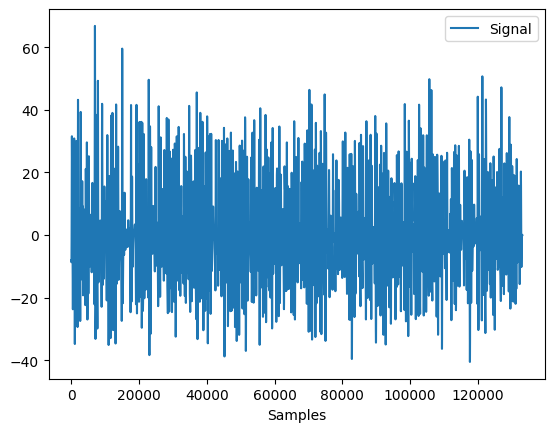

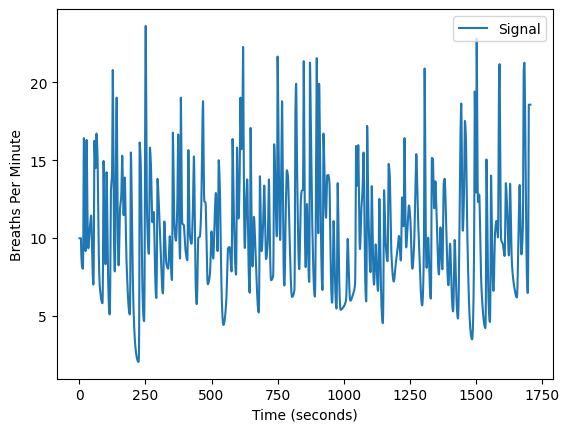

In [45]:
# # Extract peaks
rpeaks, info = nk.ecg_peaks(ecg_signals, sampling_rate=SF)

# Compute rate
ecg_rate = nk.ecg_rate(rpeaks, sampling_rate=SF, desired_length=len(dataframes[Name]["ECG"]))

edr = nk.ecg_rsp(ecg_rate, sampling_rate=SF)

rsp_signals, rsp_info = nk.rsp_process(edr, 
            sampling_rate=SF)

# Visual comparison
nk.signal_plot(rsp_signals['RSP_Clean'])

# Visualize
nk.signal_plot(rsp_signals['RSP_Rate'], sampling_rate=SF)

plt.ylabel('Breaths Per Minute')


RSP interval Related

In [46]:
epochs = nk.epochs_create(rsp_signals,
                            events = events,
                            epochs_start=event_onset_delay,
                            sampling_rate = SF, 
                            baseline_correction=False)

RSP_Features = nk.rsp_intervalrelated(epochs, sampling_rate=SF)

print(RSP_Features)

# List of columns to be removed
columns_to_remove = []

# Drop specified columns
RSP_Features_Clean = RSP_Features.drop(columns=columns_to_remove)

print(RSP_Features_Clean)

# PPG

In [ ]:
dataframes[Name].keys()

Index(['ECG', 'GSR', 'PPG_red', 'PPG_ir', 'PPG_green', 'absolute_time',
       'label'],
      dtype='object')

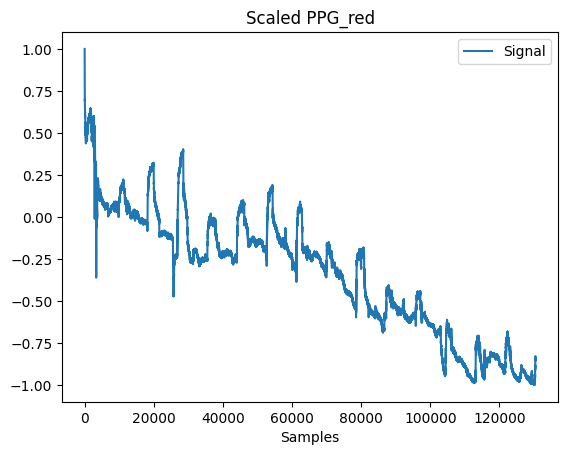

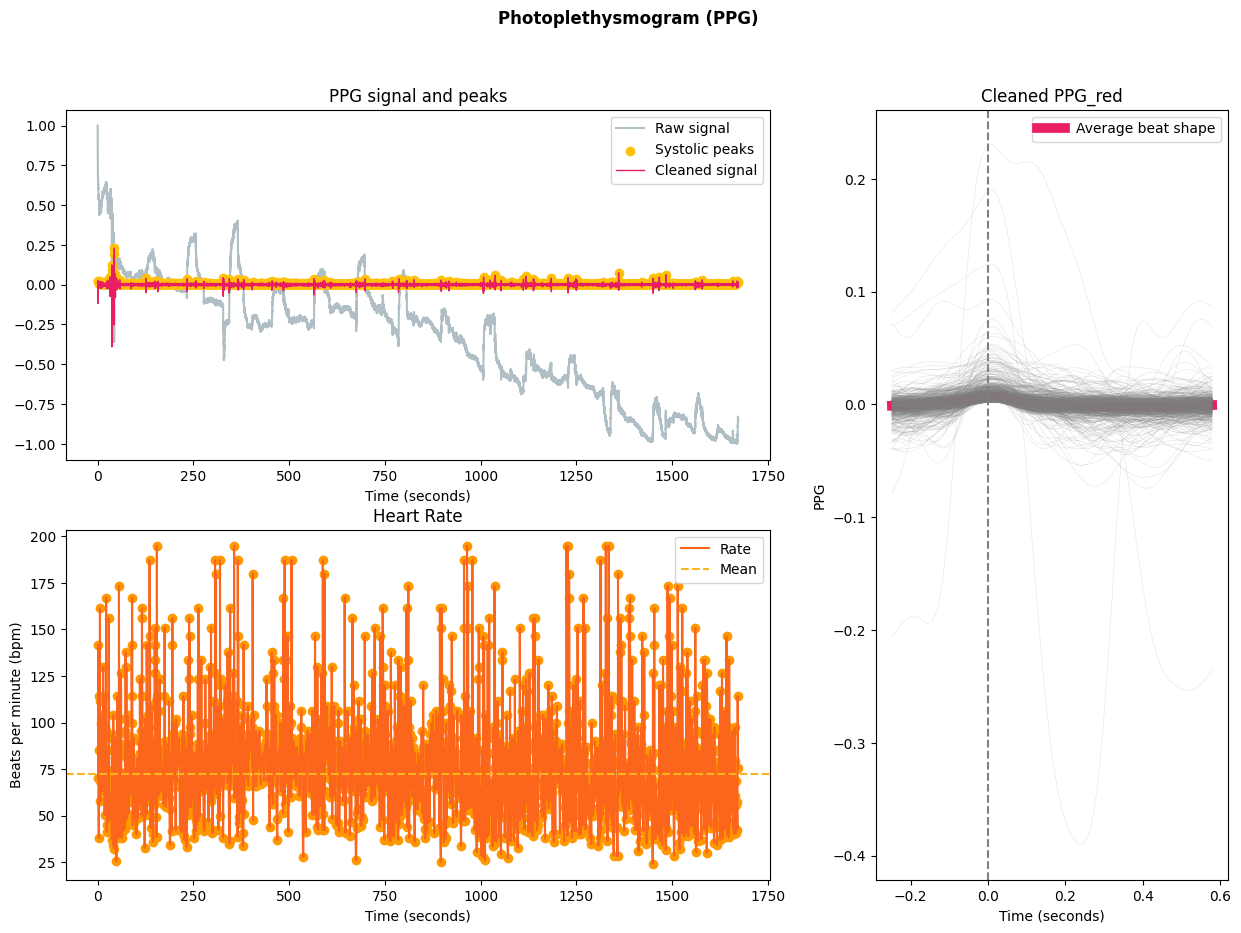

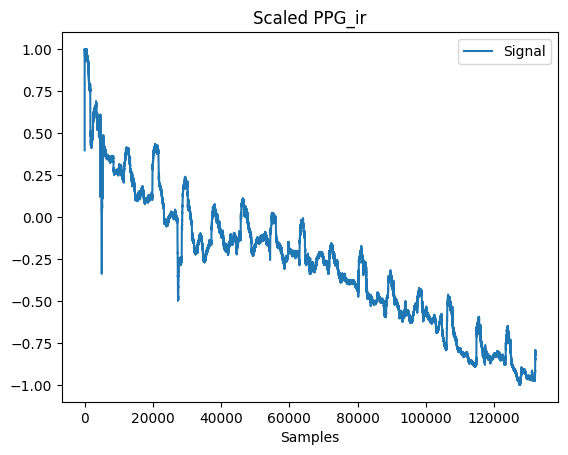

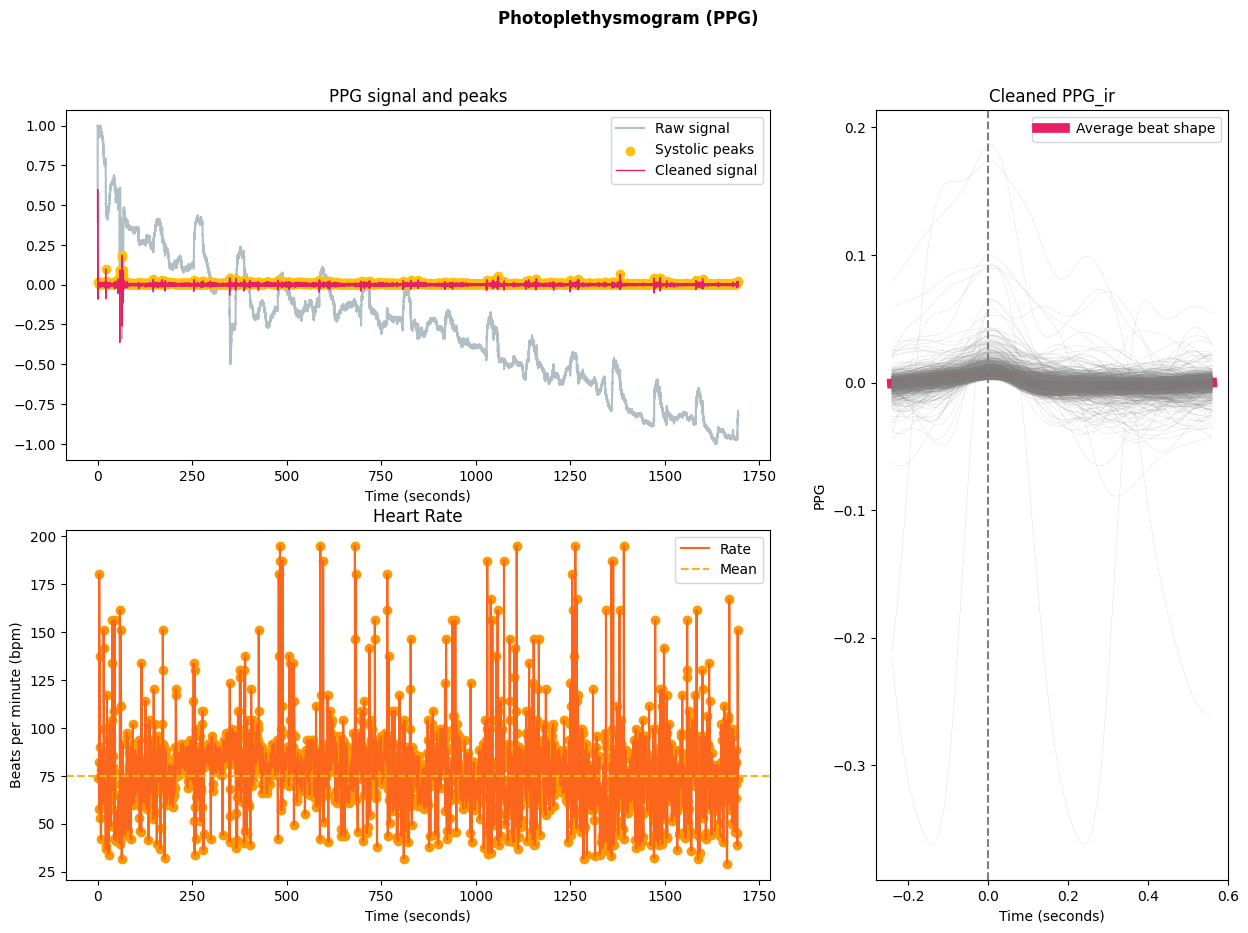

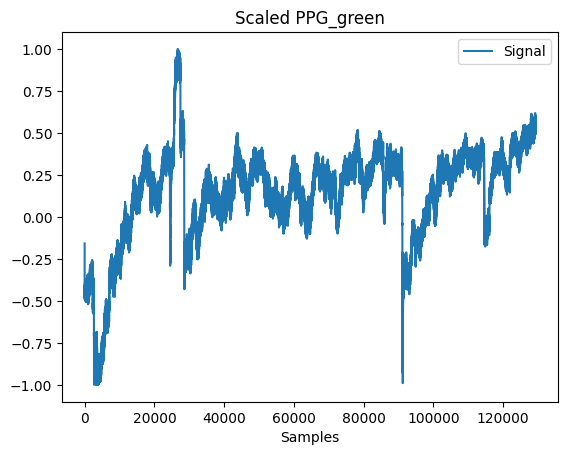

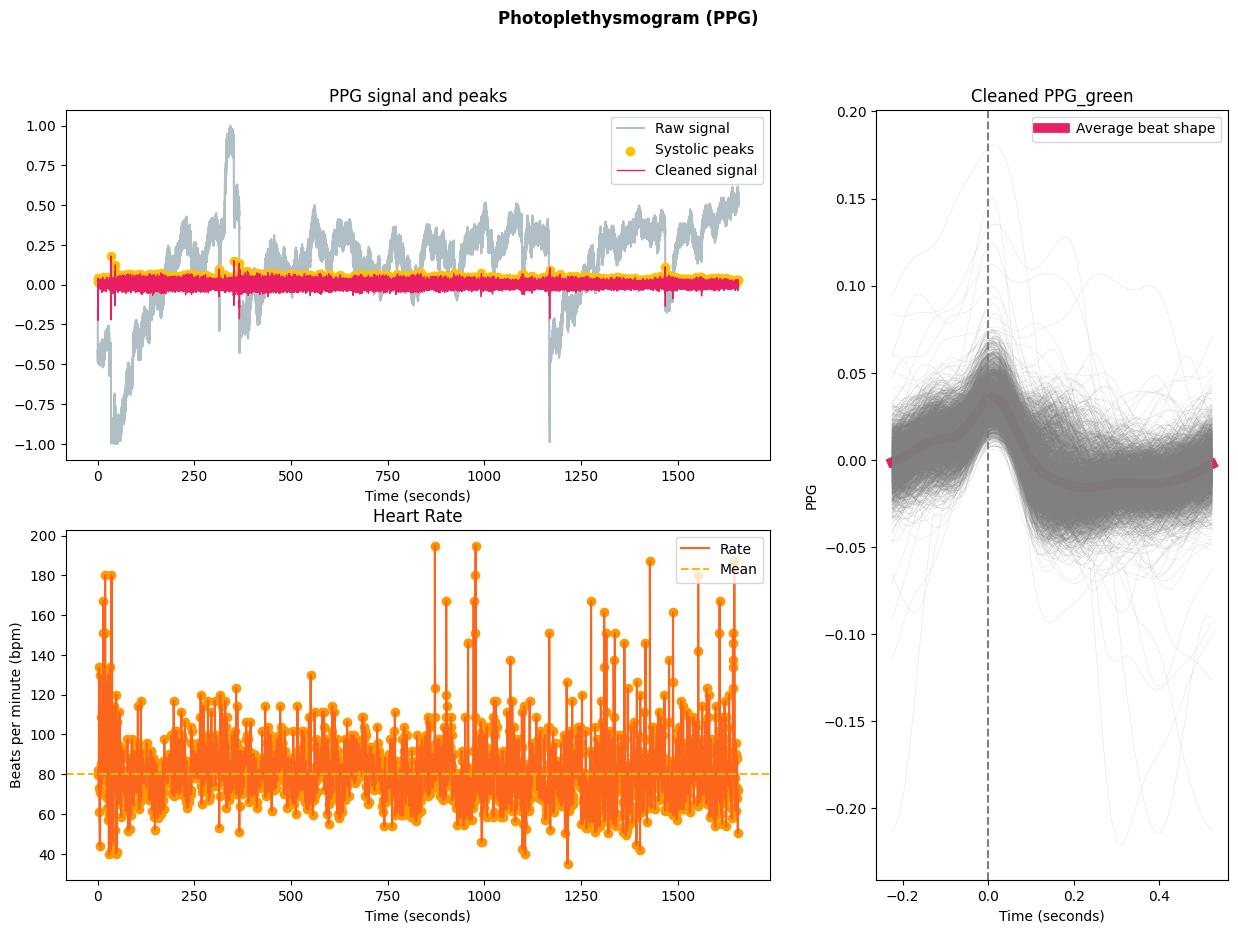

In [ ]:
from sklearn.preprocessing import RobustScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neurokit2 as nk

# Columns to process
columns_to_process = ["PPG_red", "PPG_ir", "PPG_green"]

# Define your threshold for deviation from the mean
threshold = 3

ppg_data = {}
info = {}

for column in columns_to_process:
    
    data = dataframes[Name][column]
    # Calculate the mean and standard deviation for each column
    mean = data.mean()
    std_dev = data.std()

    # Filter out outliers
    outliers_mask = (data < mean - threshold * std_dev) | (data > mean + threshold * std_dev)
    outliers = data[outliers_mask]
    filtered_ppg = data[~outliers_mask]


    # Reshape data for the scaler
    data_reshaped = filtered_ppg.values.reshape(-1, 1)

    # Initialize the RobustScaler
    robust_scaler = RobustScaler()

    # Fit and transform the data with RobustScaler
    data_robust_scaled = robust_scaler.fit_transform(data_reshaped)

    # Manually scale to [-1, 1] based on the robustly scaled data
    data_scaled_to_range = np.interp(data_robust_scaled, (data_robust_scaled.min(), data_robust_scaled.max()), (-1, 1))

    # Convert back to a pandas series
    ppg_data_scaled = pd.Series(data_scaled_to_range.flatten(), name=column + "_scaled")

    # Append the scaled data to dataframes[Name] DataFrame or handle it as needed
    # dataframes[Name].loc[:, column + "_scaled"] = ppg_data_scaled

    # Plotting scaled data
    nk.signal_plot(ppg_data_scaled)  # This line assumes you want to plot with neurokit2, adjust as necessary
    plt.title(f'Scaled {column}')
    
    # Process the PPG data with NeuroKit2
    processed_data, processed_info = nk.ppg_process(ppg_data_scaled, sampling_rate=SF, method='elgendi')
    
    # Store the processed data and info in dictionaries
    ppg_data[column] = processed_data
    info[column] = processed_info

    # Plot the cleaned PPG data
    nk.ppg_plot(processed_data, processed_info)
    plt.gcf().set_size_inches(15, 10, forward=True)
    plt.title(f'Cleaned {column}')
    
plt.show()

In [ ]:
ppg_data[column]

,PPG_Raw,PPG_Clean,PPG_Rate,PPG_Peaks
0,-0.157650,0.012665,79.577539,0
1,-0.483371,-0.076781,79.577539,0
2,-0.356685,-0.150483,79.577539,0
3,-0.411179,-0.199110,79.577539,0
4,-0.370201,-0.221922,79.577539,0
...,...,...,...,...
129258,0.516227,-0.027387,72.000000,0
129259,0.510278,-0.023083,72.000000,0
129260,0.551957,-0.017285,72.000000,0
129261,0.531662,-0.011103,72.000000,0


In [ ]:
columns_to_process = ["PPG_red", "PPG_ir", "PPG_green"]

PPG_Features = {}

for column in columns_to_process:
    # Creating epochs
    
    epochs = nk.epochs_create(ppg_data[column],
                            events = events,
                            sampling_rate = SF,
                            epochs_start=event_onset_delay,
                            baseline_correction=False)
    
                              
    PPG_Features[column] = nk.ppg_intervalrelated(epochs)


c:\Users\lauri\.virtualenvs\AML-dynaMix-AryBn7L8\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
c:\Users\lauri\.virtualenvs\AML-dynaMix-AryBn7L8\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
c:\Users\lauri\.virtualenvs\AML-dynaMix-AryBn7L8\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation 

In [ ]:
columns_to_process = ["PPG_red", "PPG_ir", "PPG_green"]
# List of columns to be removed
columns_to_remove = ['HRV_SDNN', 'HRV_SDNNI1', 'HRV_SDANN1', 'HRV_SDANN2', 'HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5']

PPG_Features_Clean = PPG_Features.copy()

for column in columns_to_process:
    
    # Make a copy of the DataFrame to ensure the original is not modified
    PPG_Features_Clean[column] = PPG_Features[column].copy()

    # Drop specified columns from the copy
    PPG_Features_Clean[column] = PPG_Features_Clean[column].drop(columns=columns_to_remove)

print(PPG_Features_Clean)


{'PPG_red':            Label  PPG_Rate_Mean  HRV_MeanNN  HRV_RMSSD   HRV_SDSD  HRV_CVNN  \
27.mp4    27.mp4      75.754362   63.560606  34.363666  34.628370  0.397051   
3.mp4      3.mp4      71.438977   67.317460  33.825215  34.097618  0.372521   
83.mp4    83.mp4      81.601796   58.521127  30.136120  30.347405  0.374942   
101.mp4  101.mp4      80.108219   58.958333  18.126706  18.255674  0.245368   
53.mp4    53.mp4      75.679344   63.671642  30.925374  31.161273  0.314437   
48.mp4    48.mp4      74.635483   63.893939  30.745106  30.983983  0.357699   
86.mp4    86.mp4      70.394674   68.209677  35.229226  35.504321  0.386795   
2.mp4      2.mp4      77.792378   62.073529  37.435716  37.717055  0.424200   
20.mp4    20.mp4      63.370058   78.500000  55.378798  55.908670  0.460157   
62.mp4    62.mp4      69.319851   70.383333  39.972448  40.307896  0.377415   
120.mp4  120.mp4      71.443559   68.532258  38.268037  38.584341  0.365205   
45.mp4    45.mp4      69.795422   70.550

# GSR

### EDA

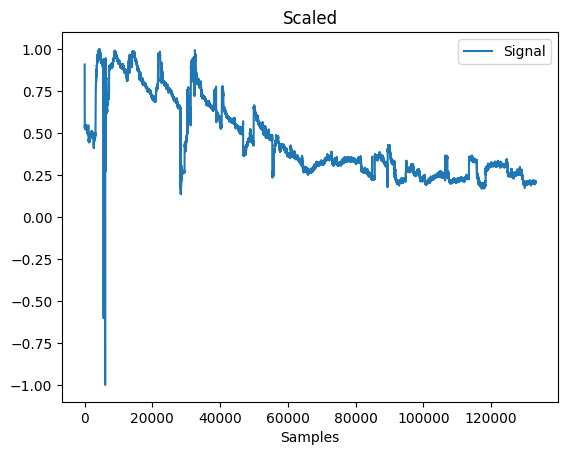

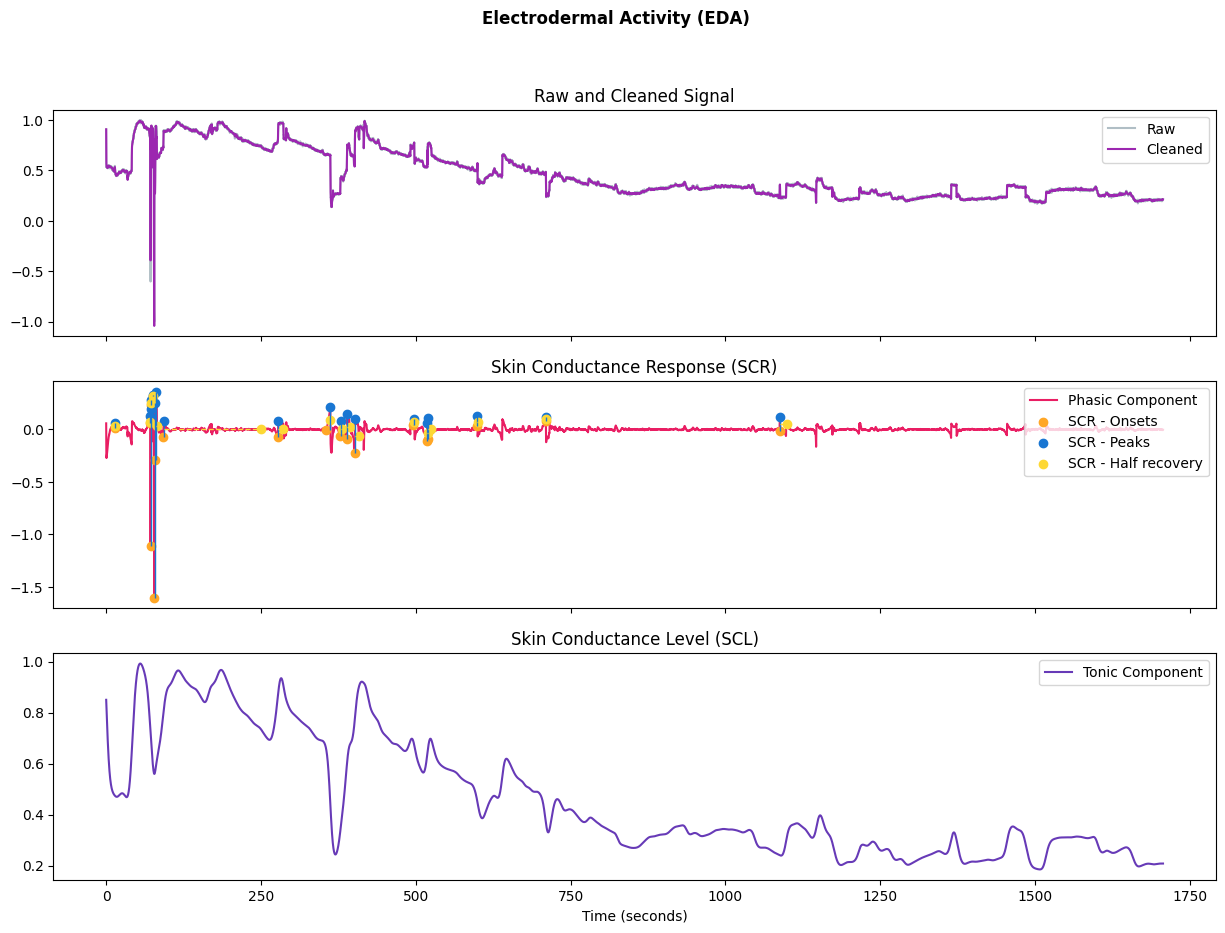

In [ ]:
from sklearn.preprocessing import RobustScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neurokit2 as nk

# Columns to process
columns_to_process = ["PPG_red", "PPG_ir", "PPG_green"]

# Define your threshold for deviation from the mean
threshold = 8


data = dataframes[Name]['GSR']
# Calculate the mean and standard deviation for each column
mean = data.mean()
std_dev = data.std()

# Filter out outliers
outliers_mask = (data < mean - threshold * std_dev) | (data > mean + threshold * std_dev)
outliers = data[outliers_mask]
filtered_GSR = data[~outliers_mask]

# Plotting
# plt.figure()
# plt.scatter(my_data['timestamp'][outliers_mask], outliers, color='red', label='Outliers')
# plt.scatter(my_data['timestamp'][~outliers_mask], filtered_GSR, color='blue', label='Filtered Data')
# plt.title(f'Outlier Removal for {column}')
# plt.legend()

# Reshape data for the scaler
data_reshaped = filtered_GSR.values.reshape(-1, 1)

# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the data with RobustScaler
data_robust_scaled = robust_scaler.fit_transform(data_reshaped)

# Manually scale to [-1, 1] based on the robustly scaled data
data_scaled_to_range = np.interp(data_robust_scaled, (data_robust_scaled.min(), data_robust_scaled.max()), (-1, 1))

# Convert back to a pandas series
gsr_data_scaled = pd.Series(data_scaled_to_range.flatten())

# Plotting scaled data
nk.signal_plot(gsr_data_scaled)  # This line assumes you want to plot with neurokit2, adjust as necessary
plt.title('Scaled')

# Process the PPG data with NeuroKit2
eda_signals, eda_info = nk.eda_process(gsr_data_scaled, sampling_rate=SF)


# Plot the cleaned PPG data
nk.eda_plot(eda_signals, eda_info)
plt.gcf().set_size_inches(15, 10, forward=True)
    
plt.show()

In [ ]:
# Creating epochs
epochs = nk.epochs_create(eda_signals, 
                            events = events,
                            epochs_start=event_onset_delay, 
                            sampling_rate = SF, 
                            baseline_correction=False)

                            
EDA_Features = nk.eda_intervalrelated(epochs)


print(EDA_Features)

# List of columns to be removed
columns_to_remove = ['EDA_Sympathetic', 'EDA_SympatheticN', 'EDA_Autocorrelation']

# Drop specified columns
EDA_Features_Clean = EDA_Features.drop(columns=columns_to_remove)

           Label  SCR_Peaks_N  SCR_Peaks_Amplitude_Mean  EDA_Tonic_SD  \
27.mp4    27.mp4            0                       NaN      0.028253   
3.mp4      3.mp4            0                       NaN      0.042204   
83.mp4    83.mp4            1                  0.218362      0.173351   
101.mp4  101.mp4            0                       NaN      0.046490   
53.mp4    53.mp4            0                       NaN      0.025297   
48.mp4    48.mp4            0                       NaN      0.038768   
86.mp4    86.mp4            0                       NaN      0.016120   
2.mp4      2.mp4            0                       NaN      0.015336   
20.mp4    20.mp4            0                       NaN      0.004329   
62.mp4    62.mp4            0                       NaN      0.038104   
120.mp4  120.mp4            0                       NaN      0.027747   
45.mp4    45.mp4            0                       NaN      0.012909   
11.mp4    11.mp4            0                      

In [ ]:
print(EDA_Features_Clean)

           Label  SCR_Peaks_N  SCR_Peaks_Amplitude_Mean  EDA_Tonic_SD
27.mp4    27.mp4            0                       NaN      0.028253
3.mp4      3.mp4            0                       NaN      0.042204
83.mp4    83.mp4            1                  0.218362      0.173351
101.mp4  101.mp4            0                       NaN      0.046490
53.mp4    53.mp4            0                       NaN      0.025297
48.mp4    48.mp4            0                       NaN      0.038768
86.mp4    86.mp4            0                       NaN      0.016120
2.mp4      2.mp4            0                       NaN      0.015336
20.mp4    20.mp4            0                       NaN      0.004329
62.mp4    62.mp4            0                       NaN      0.038104
120.mp4  120.mp4            0                       NaN      0.027747
45.mp4    45.mp4            0                       NaN      0.012909
11.mp4    11.mp4            0                       NaN      0.054511
23.mp4    23.mp4    

# Save Feature Data

In [ ]:
print(PPG_Features_Clean)

{'PPG_red':            Label  PPG_Rate_Mean  HRV_MeanNN  HRV_RMSSD   HRV_SDSD  HRV_CVNN  \
27.mp4    27.mp4      75.754362   63.560606  34.363666  34.628370  0.397051   
3.mp4      3.mp4      71.438977   67.317460  33.825215  34.097618  0.372521   
83.mp4    83.mp4      81.601796   58.521127  30.136120  30.347405  0.374942   
101.mp4  101.mp4      80.108219   58.958333  18.126706  18.255674  0.245368   
53.mp4    53.mp4      75.679344   63.671642  30.925374  31.161273  0.314437   
48.mp4    48.mp4      74.635483   63.893939  30.745106  30.983983  0.357699   
86.mp4    86.mp4      70.394674   68.209677  35.229226  35.504321  0.386795   
2.mp4      2.mp4      77.792378   62.073529  37.435716  37.717055  0.424200   
20.mp4    20.mp4      63.370058   78.500000  55.378798  55.908670  0.460157   
62.mp4    62.mp4      69.319851   70.383333  39.972448  40.307896  0.377415   
120.mp4  120.mp4      71.443559   68.532258  38.268037  38.584341  0.365205   
45.mp4    45.mp4      69.795422   70.550

In [ ]:
import json

# Function to convert NumPy types to Python native types for JSON serialization
def convert_np_types(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, np.generic):
        return obj.item()
    raise TypeError(f"Object of type '{obj.__class__.__name__}' is not JSON serializable")


# Combine your DataFrames into a dictionary with unique labels
dfs = {
    "ECG Features": ECG_Features_Clean,
    "RSP Features": RSP_Features_Clean,
    "PPG IR Features": PPG_Features_Clean['PPG_ir'],
    "PPG Red Features": PPG_Features_Clean['PPG_red'],
    "PPG Green Features": PPG_Features_Clean['PPG_green'],
    "EDA Features": EDA_Features_Clean,
}

# Convert each DataFrame into a JSON string and store it back in the dictionary
for label, df in dfs.items():
    # Convert DataFrame to a JSON-friendly structure (e.g., records) then to a string
    dfs[label] = df.to_dict(orient="records")

dfs["Video Condition"] = json.dumps(event_conditions)
# Serialize the dictionary to a JSON string
json_str = json.dumps(dfs, indent=4, default=convert_np_types)

# To save the JSON string to a file
with open(f'Features/{name}_Features_New.json', 'w') as f:
    f.write(json_str)
